In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

C:\Users\KOREAIT\anaconda3\envs\elqfjsdl\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# 데이터 수집


In [2]:
import FinanceDataReader as fdr
samsung = fdr.DataReader('005930')

In [3]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
samsung = fdr.DataReader('005930')


In [86]:
samsung

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-09-14,806,814,794,804,410550,NaN
1998-09-15,799,804,766,783,698220,-0.026119
1998-09-16,785,810,779,785,439220,0.002554
1998-09-17,785,789,766,770,429930,-0.019108
1998-09-18,727,747,680,690,1432270,-0.103896
...,...,...,...,...,...,...
2022-12-08,58700,59200,58600,59200,12986815,0.005093
2022-12-09,59300,60600,59300,60400,10529632,0.020270
2022-12-12,59900,60000,59400,59500,9036472,-0.014901


In [5]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')

In [8]:
apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099874,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094663,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087715,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089886,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092492,73449600


In [9]:
# Ford(F), 1980-01-01 ~ 2019-12-30 (40년 데이터)
ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')

In [11]:
ford.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-01-02,1.297609,1.328022,1.287471,1.287471,0.265383,2044376
1980-01-03,1.287471,1.287471,1.267196,1.287471,0.265383,2816257
1980-01-04,1.287471,1.287471,1.272265,1.277334,0.263294,3038203
1980-01-07,1.277334,1.287471,1.267196,1.267196,0.261204,2251526
1980-01-08,1.267196,1.292540,1.257059,1.292540,0.266428,4069022


In [13]:
ford.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-20,9.50,9.54,9.44,9.48,8.981937,50191200
2019-12-23,9.50,9.57,9.40,9.44,8.944040,54784400
2019-12-24,9.44,9.49,9.43,9.47,8.972463,11881600
2019-12-26,9.47,9.49,9.43,9.45,8.953514,28961300
2019-12-27,9.45,9.46,9.35,9.36,8.868242,28272800


In [15]:
STOCK_CODE = '005930'

In [16]:
stock = fdr.DataReader(STOCK_CODE)

In [17]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-09-14,806,814,794,804,410550,NaN
1998-09-15,799,804,766,783,698220,-0.026119
1998-09-16,785,810,779,785,439220,0.002554
1998-09-17,785,789,766,770,429930,-0.019108
1998-09-18,727,747,680,690,1432270,-0.103896


In [18]:
stock.index

DatetimeIndex(['1998-09-14', '1998-09-15', '1998-09-16', '1998-09-17',
               '1998-09-18', '1998-09-19', '1998-09-21', '1998-09-22',
               '1998-09-23', '1998-09-24',
               ...
               '2022-12-01', '2022-12-02', '2022-12-05', '2022-12-06',
               '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-12',
               '2022-12-13', '2022-12-14'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

In [20]:
#시간별 피처별로 나누기
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

Text(0, 0.5, 'price')

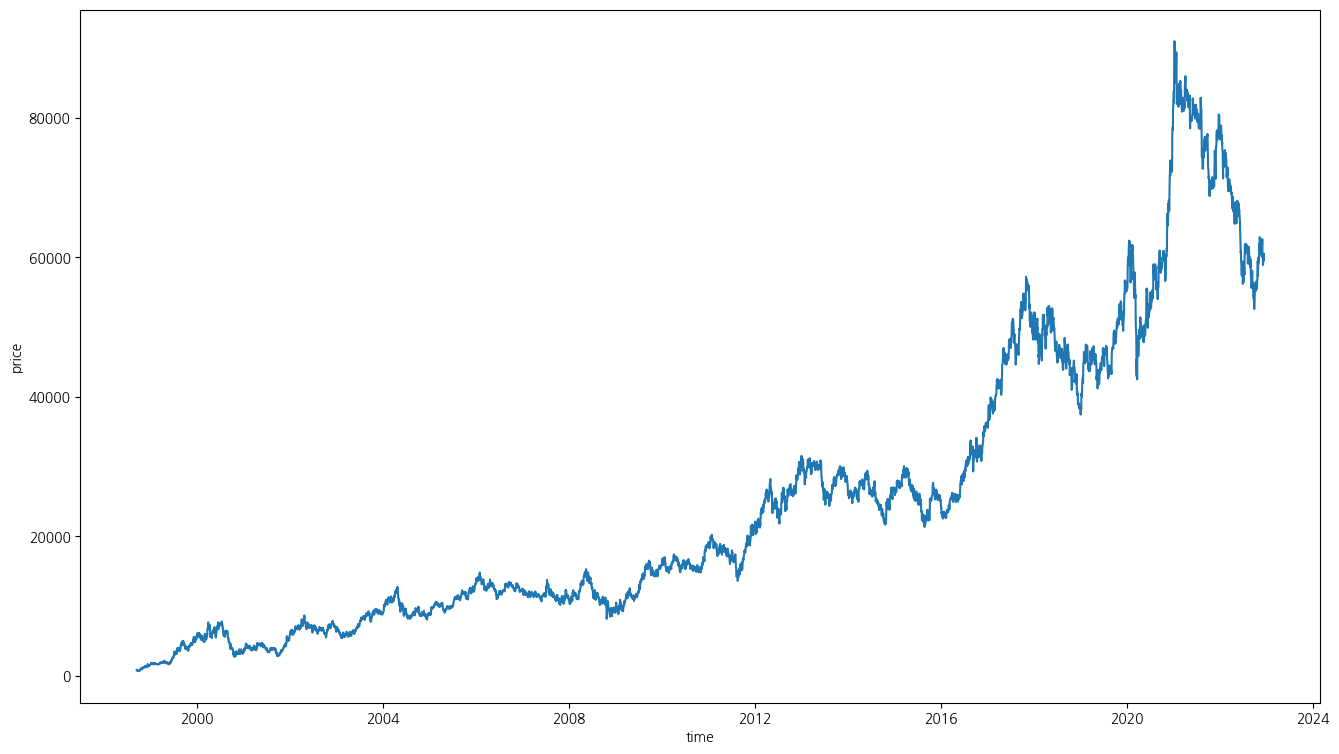

In [21]:
#시각화
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

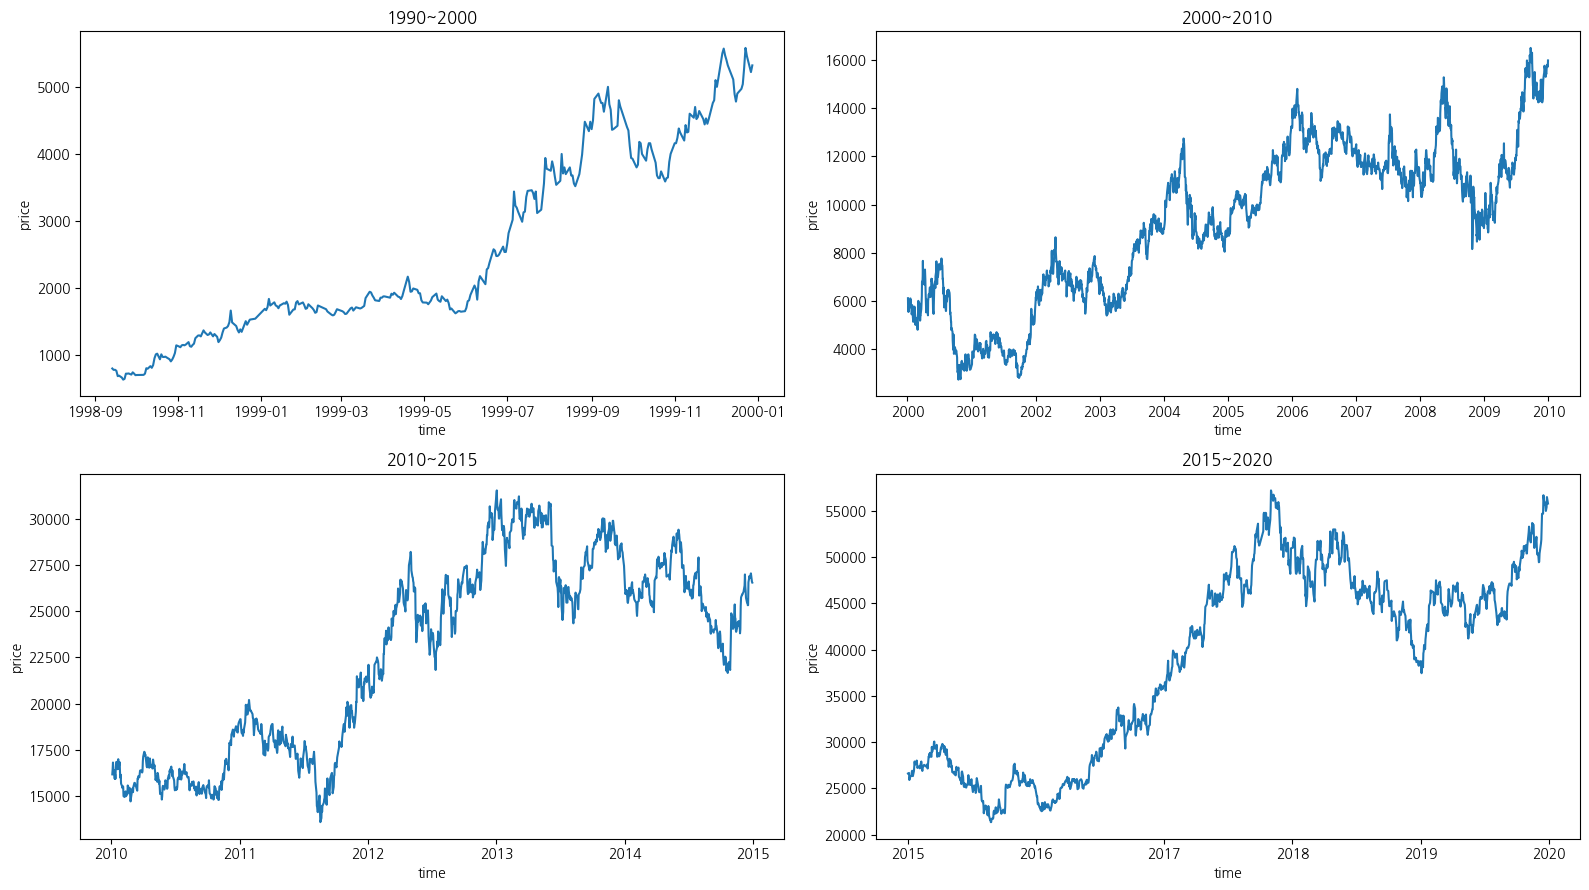

In [22]:
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2]
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

# 데이터 전처리

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.0089258 , 0.00840909, 0.00887151, 0.00183706, 0.0045462 ],
       [0.00884828, 0.00830579, 0.00855866, 0.00160466, 0.0077317 ],
       [0.00869324, 0.00836777, 0.00870391, 0.00162679, 0.00486368],
       ...,
       [0.66334441, 0.61983471, 0.66368715, 0.65140214, 0.10006483],
       [0.66002215, 0.62293388, 0.66368715, 0.65361546, 0.10011356],
       [0.66223699, 0.62603306, 0.66815642, 0.66246874, 0.04142631]])

In [24]:
df = pd.DataFrame(scaled, columns=scale_cols)

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), df['Close'], test_size=0.2, random_state=0,)

In [28]:
x_train.shape, y_train.shape


((4800, 4), (4800,))

In [29]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [30]:
x_train

,Open,High,Low,Volume
3381,0.292359,0.276860,0.294302,0.003656
31,0.010797,0.010424,0.010693,0.009742
1596,0.116058,0.109298,0.116425,0.004625
1386,0.141085,0.131818,0.139888,0.006222
4237,0.280177,0.262190,0.281341,0.001594
...,...,...,...,...
4931,0.496678,0.469008,0.501117,0.070973
3264,0.218383,0.204545,0.215642,0.003783
1653,0.110631,0.103719,0.110615,0.002589
2607,0.122038,0.117975,0.122458,0.004624


In [31]:
#데이터셋 준비하기
import tensorflow as tf

In [32]:
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [64]:
WINDOW_SIZE=50
BATCH_SIZE=50


In [65]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [66]:
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (50, 50, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (50, 1)


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=50, kernel_size=10,
           padding="causal",
           activation="elu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(20, activation='tanh'),
    Dense(20, activation="elu"),
    Dense(1),
])
loss = Huber()
optimizer = Adam(0.05)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [79]:
loss = Huber()
optimizer = Adam(0.05)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [80]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=50)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=20)

In [81]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=150, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/150
95/95 [==============================] - 4s 30ms/step - loss: 0.0594 - mse: 0.1351 - val_loss: 0.0270 - val_mse: 0.0541

Epoch 00001: val_loss improved from inf to 0.02704, saving model to tmp\ckeckpointer.ckpt
Epoch 2/150
95/95 [==============================] - 2s 19ms/step - loss: 0.0265 - mse: 0.0530 - val_loss: 0.0273 - val_mse: 0.0546

Epoch 00002: val_loss did not improve from 0.02704
Epoch 3/150
95/95 [==============================] - 2s 18ms/step - loss: 0.0264 - mse: 0.0528 - val_loss: 0.0274 - val_mse: 0.0547

Epoch 00003: val_loss did not improve from 0.02704
Epoch 4/150
95/95 [==============================] - 2s 16ms/step - loss: 0.0265 - mse: 0.0531 - val_loss: 0.0276 - val_mse: 0.0553

Epoch 00004: val_loss did not improve from 0.02704
Epoch 5/150
95/95 [==============================] - 1s 13ms/step - loss: 0.0264 - mse: 0.0528 - val_loss: 0.0271 - val_mse: 0.0543

Epoch 00005: val_loss did not improve from 0.02704
Epoch 6/150
95/95 [======================


Epoch 00044: val_loss did not improve from 0.02702
Epoch 45/150
95/95 [==============================] - 1s 13ms/step - loss: 0.0266 - mse: 0.0531 - val_loss: 0.0271 - val_mse: 0.0542

Epoch 00045: val_loss did not improve from 0.02702
Epoch 46/150
95/95 [==============================] - 2s 16ms/step - loss: 0.0264 - mse: 0.0529 - val_loss: 0.0278 - val_mse: 0.0556

Epoch 00046: val_loss did not improve from 0.02702
Epoch 47/150
95/95 [==============================] - 2s 15ms/step - loss: 0.0265 - mse: 0.0530 - val_loss: 0.0270 - val_mse: 0.0541

Epoch 00047: val_loss did not improve from 0.02702
Epoch 48/150
95/95 [==============================] - 2s 17ms/step - loss: 0.0269 - mse: 0.0538 - val_loss: 0.0279 - val_mse: 0.0558

Epoch 00048: val_loss did not improve from 0.02702
Epoch 49/150
95/95 [==============================] - 1s 14ms/step - loss: 0.0271 - mse: 0.0541 - val_loss: 0.0275 - val_mse: 0.0549

Epoch 00049: val_loss did not improve from 0.02702
Epoch 50/150
95/95 [===

95/95 [==============================] - 2s 16ms/step - loss: 0.0279 - mse: 0.0558 - val_loss: 0.0306 - val_mse: 0.0611

Epoch 00088: val_loss did not improve from 0.02702
Epoch 89/150
95/95 [==============================] - 2s 16ms/step - loss: 0.0267 - mse: 0.0534 - val_loss: 0.0271 - val_mse: 0.0543

Epoch 00089: val_loss did not improve from 0.02702
Epoch 90/150
95/95 [==============================] - 1s 13ms/step - loss: 0.0265 - mse: 0.0529 - val_loss: 0.0273 - val_mse: 0.0545

Epoch 00090: val_loss did not improve from 0.02702
Epoch 91/150
95/95 [==============================] - 1s 11ms/step - loss: 0.0265 - mse: 0.0530 - val_loss: 0.0275 - val_mse: 0.0550

Epoch 00091: val_loss did not improve from 0.02702
Epoch 92/150
95/95 [==============================] - 1s 11ms/step - loss: 0.0266 - mse: 0.0533 - val_loss: 0.0278 - val_mse: 0.0556

Epoch 00092: val_loss did not improve from 0.02702
Epoch 93/150
95/95 [==============================] - 1s 11ms/step - loss: 0.0265 - mse:

95/95 [==============================] - 1s 12ms/step - loss: 0.0272 - mse: 0.0544 - val_loss: 0.0273 - val_mse: 0.0547

Epoch 00132: val_loss did not improve from 0.02702
Epoch 133/150
95/95 [==============================] - 2s 14ms/step - loss: 0.0271 - mse: 0.0541 - val_loss: 0.0299 - val_mse: 0.0598

Epoch 00133: val_loss did not improve from 0.02702
Epoch 134/150
95/95 [==============================] - 2s 17ms/step - loss: 0.0278 - mse: 0.0557 - val_loss: 0.0270 - val_mse: 0.0541

Epoch 00134: val_loss did not improve from 0.02702
Epoch 135/150
95/95 [==============================] - 2s 19ms/step - loss: 0.0267 - mse: 0.0535 - val_loss: 0.0270 - val_mse: 0.0541

Epoch 00135: val_loss did not improve from 0.02702
Epoch 136/150
95/95 [==============================] - 2s 17ms/step - loss: 0.0265 - mse: 0.0530 - val_loss: 0.0273 - val_mse: 0.0546

Epoch 00136: val_loss did not improve from 0.02702
Epoch 137/150
95/95 [==============================] - 2s 22ms/step - loss: 0.0267 -

In [82]:
model.load_weights(filename)

In [83]:
pred = model.predict(test_data)

In [84]:
pred.shape

(1150, 1)

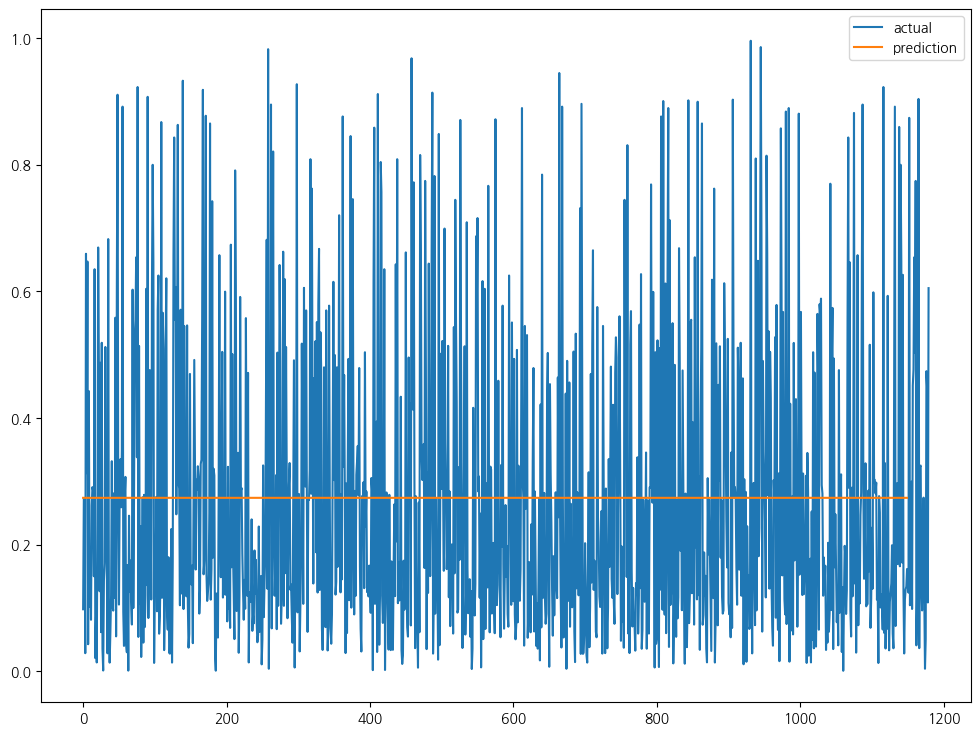

In [85]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()